# Scientific Data Visualization (SDV 2022)

## Campus Recruitment - Academic and Employability Factors influencing placement

### Stefan Buciu 

#### Abstract

*The purpose of this work is to identify the factors that influences the chances of a student candidate in getting placed in a master's programme. The data used in this study is coming from a public Kaggle dataset of 215 candidates from Indian universities. Visualizations and t-tests were used to prove the hypothesis that students which perform well in tests are more likely to get placed.*


#### Introduction

##### Background

There are a couple of papers that discuss campus recruitment, however they touch only on the statistical information with little to no visualizations. From the papers listed in the [References](#references), most of them showed tables of statistical parameters. The studies show that there is a strong correlation between GPA and the chances of landing a job.

##### Dataset

This dataset consists of placement data of students in masters degrees. It has 15 columns, containing information about percentages obtained at various tests. Additionally, the data has a gender column which will be interesting to investigate for bias in various areas such as salary.

##### Objectives

With the help of data visualization, I want to answer the following questions:

1. Which factor influenced a candidate in getting placed?
2. Does percentage matters for a candidate to get placed?
3. Which degree specialization is much demanded by corporate?
4. Is there any gender bias in salary packages?

I expect to see that students with good performances are more likely to get placed. From a gender perspective, I am expecting to see little to no gender bias in salaries plans.


#### Process - data analysis



In [125]:
# Load the dataset with pandas
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

placements_df = pd.read_csv('./Placement_Data_Full_Class.csv')

placements_df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


##### Understanding the columns

| **Column name** | **Description**                                          |
|-----------------|----------------------------------------------------------|
| sl_no           | Serial Number                                            |
| gender          | Male='M'<br>Female='F'                                   |
| ssc_p           | Secondary Education percentage- 10th Grade               |
| ssc_b           | Board of Education- Central/ Others                      |
| hsc_p           | Higher Secondary Education percentage- 12th Grade        |
| hsc_b           | Board of Education- Central/ Others                      |
| hsc_s           | Specialization in Higher Secondary Education             |
| degree_p        | Degree Percentage                                        |
| degree_t        | Under Graduation(Degree type)- Field of degree education |
| workex          | Work experience                                          |
| etest_p         | Employability test percentage (conducted by college)     |
| specialisation  | Post Graduation (MBA)- Specialization                    |
| mba_p           | MBA percentage                                           |
| status          | Status of placement- Placed/Not placed                   |
| salary          | Salary offered by corporate to candidates                |

In [126]:
# Observing the data types

from IPython.display import display, HTML

print('Memory usage:')
display(placements_df.memory_usage(deep=True))

print('Data types:')
display(placements_df.dtypes)

print('Shape:')
placements_df.shape

Memory usage:


Index               128
sl_no              1720
gender            12470
ssc_p              1720
ssc_b             13661
hsc_p              1720
hsc_b             13629
hsc_s             13840
degree_p           1720
degree_t          14098
workex            12759
etest_p            1720
specialisation    13665
mba_p              1720
status            13813
salary             1720
dtype: int64

Data types:


sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

Shape:


(215, 15)

From the column description, we observed that some of these columns are in fact categorical, such as: gender (M/F), status (Placed/NotPlaced). We can reduce memory used.

In [127]:
gender_series = placements_df['gender'].astype('category')
print(gender_series.memory_usage(deep=True))
gender_series.head()


567


0    M
1    M
2    M
3    M
4    M
Name: gender, dtype: category
Categories (2, object): ['F', 'M']

We reduced the memory usage from `12470` bytes to just `567`. Let's do that for every categorical column and update the main data frame.

In [128]:
dtypes = placements_df.dtypes
for columnName, columnType in dtypes.iteritems():
  if columnType == 'object':
    placements_df[columnName] = placements_df[columnName].astype('category')

print('Memory usage:')
display(placements_df.memory_usage(deep=True))

print('Data types:')
display(placements_df.dtypes)

placements_df.head()

Memory usage:


Index              128
sl_no             1720
gender             439
ssc_p             1720
ssc_b              450
hsc_p             1720
hsc_b              450
hsc_s              513
degree_p          1720
degree_t           517
workex             442
etest_p           1720
specialisation     450
mba_p             1720
status             453
salary            1720
dtype: int64

Data types:


sl_no                int64
gender            category
ssc_p              float64
ssc_b             category
hsc_p              float64
hsc_b             category
hsc_s             category
degree_p           float64
degree_t          category
workex            category
etest_p            float64
specialisation    category
mba_p              float64
status            category
salary             float64
dtype: object

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Does this data set respect the *tidy data* norms? Yes, because:

1. we do not have any columns headers that represent values
2. every row is an observation
3. this dataset treats only one observational unit


When we looked at the head of the data frame, we saw that there is already an entry which has a missing value (the salary). Let's have a look at the missing data.

<AxesSubplot:>

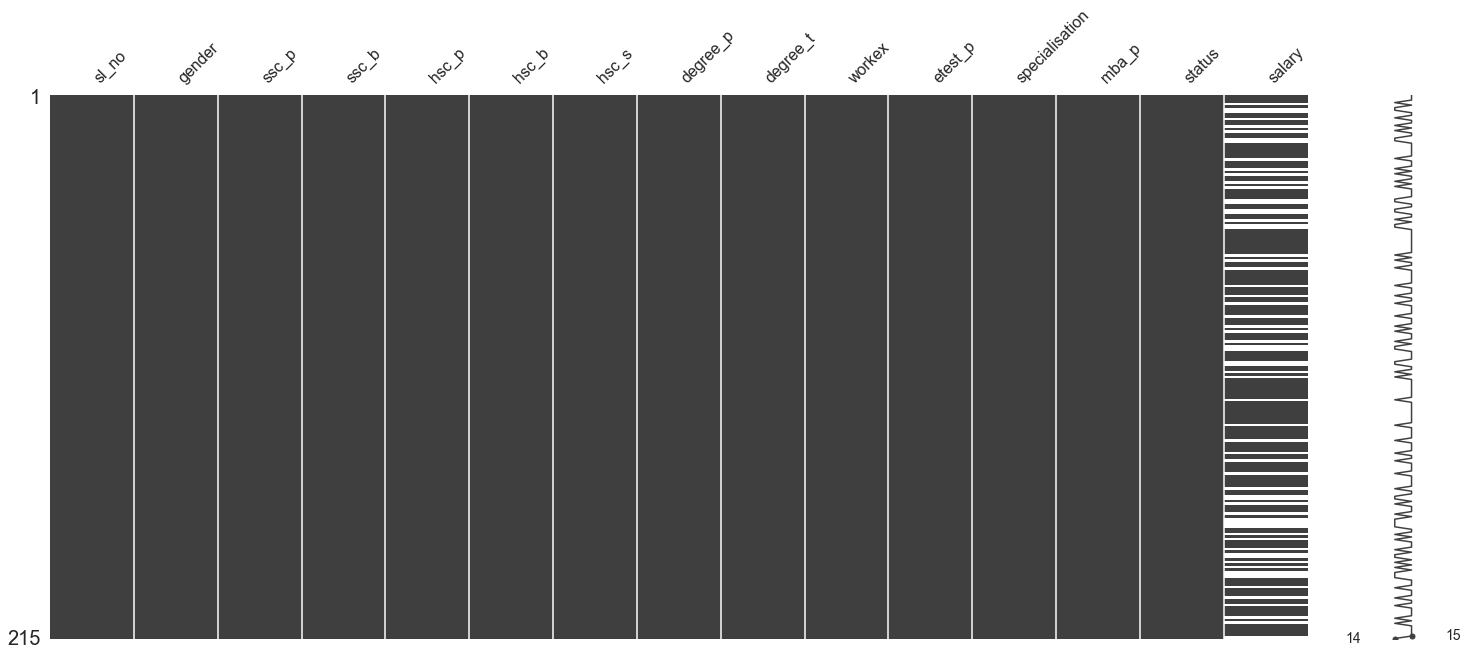

In [129]:
import missingno as msno

msno.matrix(placements_df)

We can see that the salary column has a lot of missing values. Let's see how many.

In [130]:
placements_df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

There are `67` missing salary values. Fortunately, all the other columns are okay.

We cannot remove these records since they are almost one third of our dataset. Let's check if these values are missing for the people that are not working. In that case, we can set the salary as `0`.

In [131]:
placements_df[(placements_df['status'] == 'Not Placed') & (placements_df['salary'].isnull())]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,4,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
5,6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
9,10,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN
12,13,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,NaN
201,202,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,NaN
206,207,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,NaN
208,209,F,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,NaN


We can see that there are `67` rows which means that only the people that do not work are having NaN for salary. If there were people that were working, and with a NaN salary, that would probably mean that they did not want to disclose that information.

Let's set these values to `0`.

In [132]:
placements_df['salary'].fillna(value=0, inplace=True)

The next step is to look into outliers.

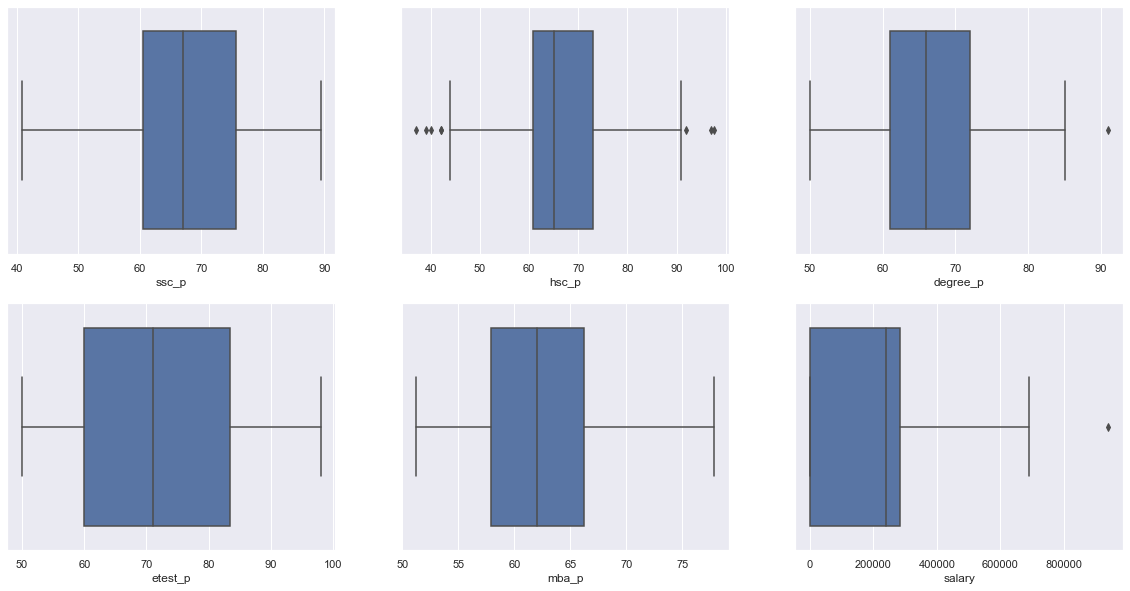

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

row = 0
col = 0
for columnName, columnType in placements_df.dtypes.iteritems():
  if columnType != 'category' and columnName != 'sl_no':
    sns.boxplot(x=columnName, data=placements_df, ax=axs[row][col])

    col += 1
  
  if col == 3:
    row = 1
    col = 0

We do not have many outliers. Most of them are located in the `hsc_p` column (i.e., Higher Secondary Education Percentage). As there are only a few of them, I will leave them in.

Now that we did our due diligence with the data set, let's start answering some of the research questions. Firstly, we want to check which factor influenced a candidate in getting placed. To begin with, we need to look at the percentages the candidates scored.

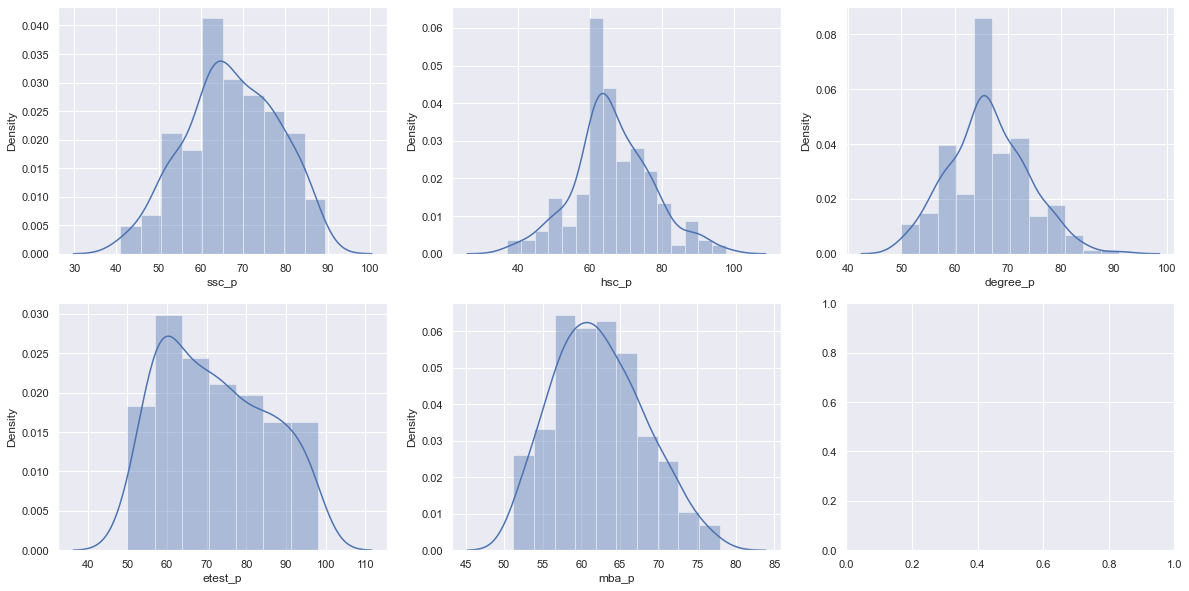

In [134]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

row = 0
col = 0
for columnName, columnType in placements_df.dtypes.iteritems():
  if columnType != 'category' and columnName not in ['sl_no', 'salary']:
    sns.distplot(placements_df[columnName], ax=axs[row][col])
    col += 1
  
  if col == 3:
    row = 1
    col = 0

The percentages columns follow a normal distribution. Moreover, most candidates score between 60% and 80%, which is to be expected. Let's now see how these percentages reflect placement.

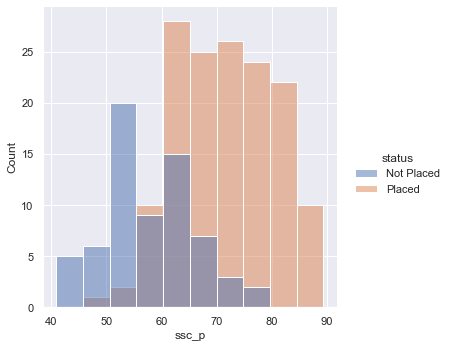

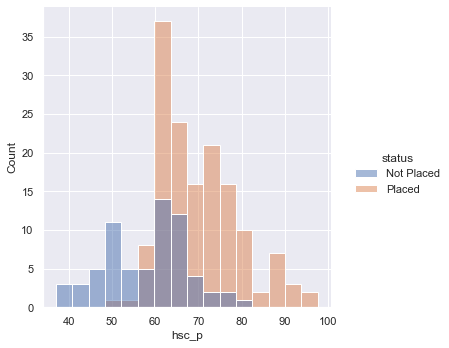

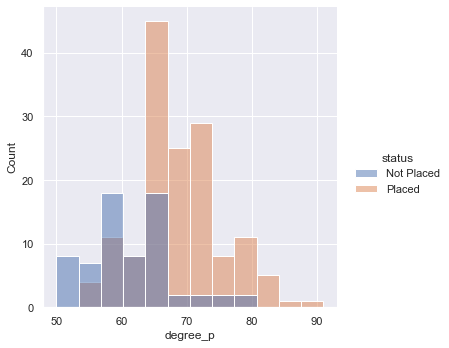

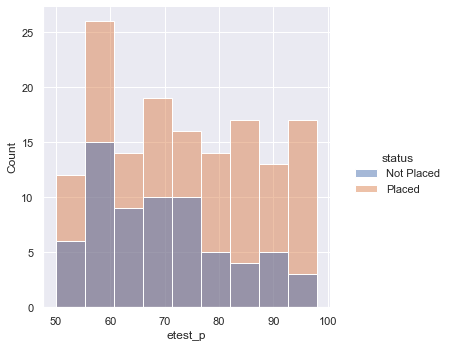

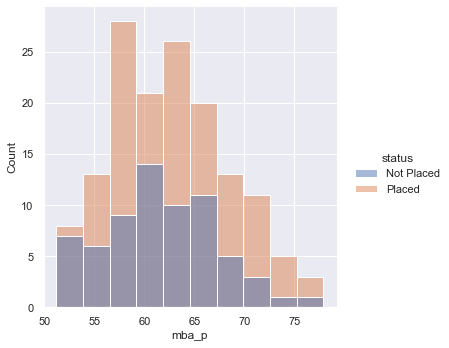

In [135]:
for columnName, columnType in placements_df.dtypes.iteritems():
  if columnType != 'category' and columnName not in ['sl_no', 'salary']:
    sns.displot(data=placements_df, x=columnName, hue='status')


From these plots we can see that people that are consistently scoring well are more likely to get placed. The least informative percentage is the `etest_p` (i.e., Employability test percentage). Even if some candidates score poorly, they still can get placed.

Let's run a Paired t-test on each percentage to see if there is any statistical differences.

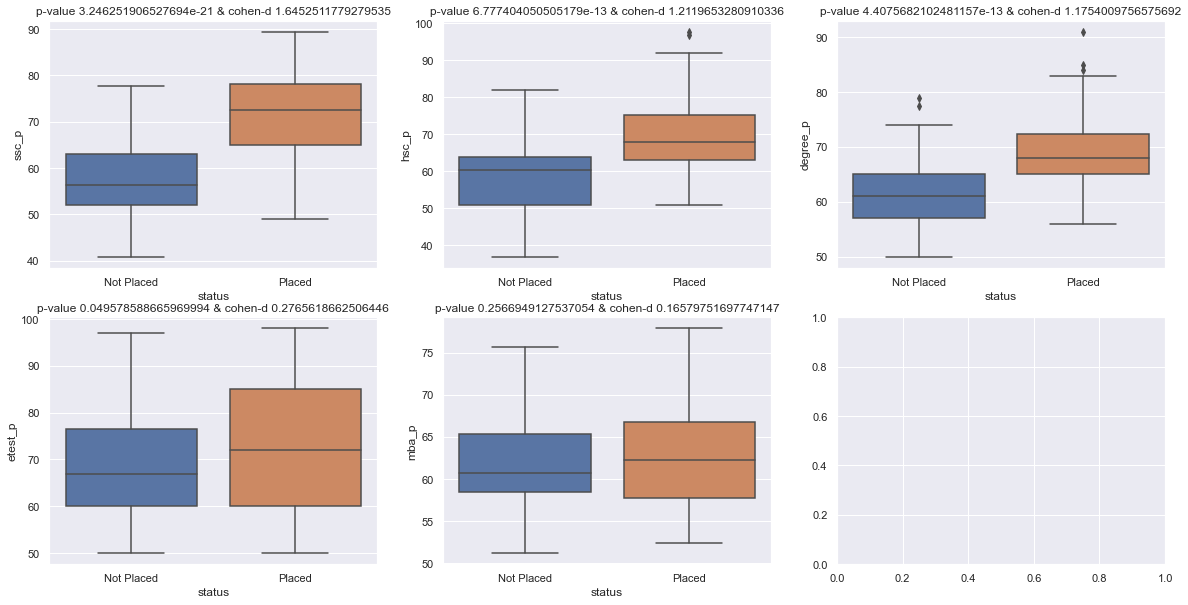

In [136]:
import pingouin as pg

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

row = 0
col = 0
for columnName, columnType in placements_df.dtypes.iteritems():
  if columnType != 'category' and columnName not in ['sl_no', 'salary']:
    placed = placements_df[placements_df['status'] == 'Placed'][columnName]
    not_placed = placements_df[placements_df['status'] == 'Not Placed'][columnName]

    ttest = pg.ttest(placed, not_placed, paired=True)

    pval = float(ttest['p-val'])
    cohend = float(ttest['cohen-d'])
    title = f'p-value {pval} & cohen-d {cohend}'
    sns.boxplot(x='status', y=columnName, data=placements_df, ax=axs[row][col]).set_title(title)

    col += 1
  
  if col == 3:
    row = 1
    col = 0

We can deduce now that the `ssc_p`, `hsc_p`, and `degree_p` are the more important features in predicting a placement. That's because, the `p-value` is a lot smaller than $\alpha$=0.05, and the effect size (i.e., Cohen's D) is a lot bigger than d=0.2, meaning that the effect size is large.

In the case of `etest_p` and `mba_p`, these indicators are not suggesting significant statistical differences. 

Another factor to look at is work experience and how that relates to job placements.

[Text(0, 0, '84'), Text(0, 0, '64')]

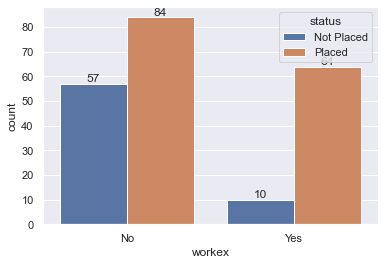

In [137]:
ax = sns.countplot(x='workex', hue='status', data=placements_df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

We can immediately see that work experience does matter, as most candidates are successfully placed, with a 86.49% chance. Whereas, the candidates that did not work before, have only a 59.57% chance of landing a job.

Work experience is not mandatory, as seen by the large number of students placed, but it increases your chances.

Thus, the most important factors that are influencing the chances of getting placed are:

- `ssc_p`: Secondary Education Percentage - 10th Grade
- `hsc_p`: Higher Education Percentage - 12th Grade
- `degree_p`: Degree Percentage
- `workex`: Work experience

We can also answer the second question. Percentages do actually matter, especially the ones mentioned above. In fact, if you score lower than 60% it is unlikely that you are getting placed.

To see what degree is sought after by the corporate, we can have a look at degrees of the people that have work experience.

[Text(0, 0, '51'), Text(0, 0, '23')]

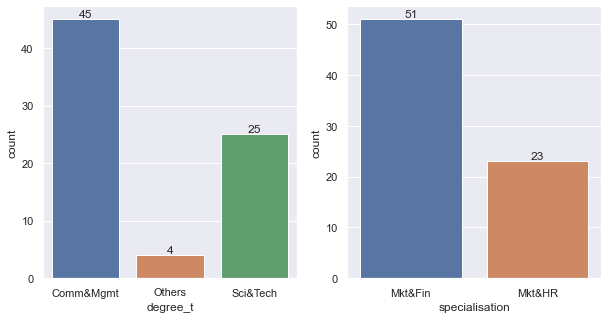

In [138]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

ax = sns.countplot(x='degree_t', data=placements_df[placements_df['workex'] == 'Yes'], ax=axs[0])
ax.bar_label(ax.containers[0])

ax = sns.countplot(x='specialisation', data=placements_df[placements_df['workex'] == 'Yes'], ax=axs[1])
ax.bar_label(ax.containers[0])

We can see that a bachelor's in Commerce and Management is the most popular, followed by Science and Tech. As for master's degrees, Marketing and Finance seems to be more needed, followed by Marketing and HR.

This dataset is separated by gender. To see if there is any gender bias, we will need to perform some gender based visualization. Firstly, let's see if the dataset is balanced from a gender perspective.

[Text(0, 0, '139'), Text(0, 0, '76')]

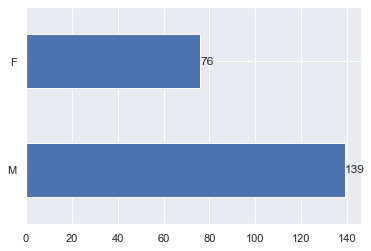

In [139]:
ax = placements_df['gender'].value_counts().plot(kind='barh')
ax.bar_label(ax.containers[0])


We can see that we have almost twice as many male records than female ones.

Let's look at all categorical features based on gender.

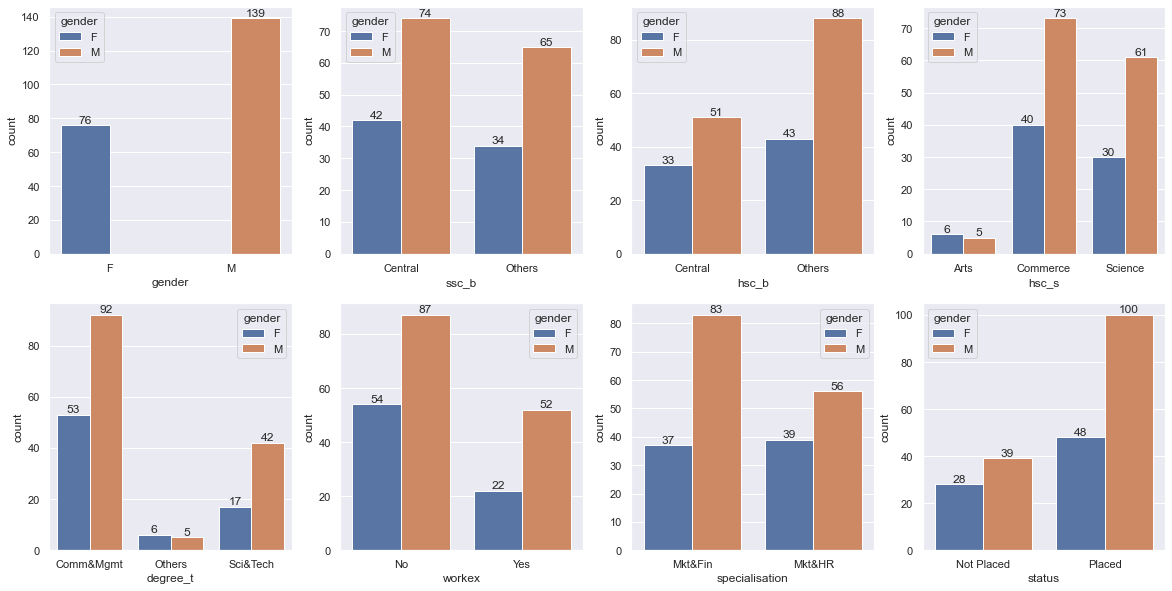

In [140]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

row = 0
col = 0
for columnName, columnType in placements_df.dtypes.iteritems():
  if columnType == 'category':
    ax = sns.countplot(x=columnName, hue='gender', data=placements_df, ax=axs[row][col])
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])

    col += 1
  
  if col == 4:
    row = 1
    col = 0


Since we have almost double the number of males than females, we can see that this ratio is roughly the same when it comes to the other categorical features.


Is there any salary discrimination?


<AxesSubplot:xlabel='specialisation', ylabel='salary'>

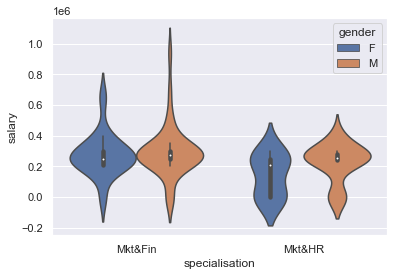

In [141]:
sns.violinplot(x='specialisation', y='salary', hue='gender', data=placements_df[placements_df['workex'] == 'Yes'])


In Marketing and Finance, the average salaries are roughly the same, however the top ones are give to males. But, In Marketing and HR, the average salary is higher for males.

Let's also perform a gender based paired t-test for salaries.

Text(0.5, 1.0, 'p-value 0.283 & cohen-d 0.270')

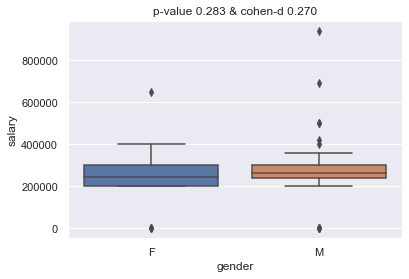

In [142]:
male_salaries = placements_df[(placements_df['workex'] == 'Yes') & (placements_df['gender'] == 'M')]['salary']
female_salaries = placements_df[(placements_df['workex'] == 'Yes') & (placements_df['gender'] == 'F')]['salary']

ttest = pg.ttest(male_salaries, female_salaries, paired=True)

pval = float(ttest['p-val'])
cohend = float(ttest['cohen-d'])
title = f'p-value {pval:.3f} & cohen-d {cohend:.3f}'
sns.boxplot(x='gender', y='salary', data=placements_df[placements_df['workex'] == 'Yes']).set_title(title)

We can see based on the `p-value` and `cohen-d` parameters that the gender plays only a small part in the salary outcome.

#### Conclusion

As we hypothesized, the students that perform better in tests are more likely to get placed. As for gender biases, we observed that there is a salary discrepancy, the males being paid better on average than females. However, we have a small number of samples and the classes are not balanced. With a bigger dataset, we could probably get to other results.

#### References

- [Campus Recruitment Kaggle dataset](https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement?datasetId=59695)
- GOKULADAS, V. K. Predictors of employability of engineering graduates in campus recruitment drives of Indian software services companies. International Journal of Selection and Assessment, 2011, 19.3: 313-319.
- RAJKUMAR, V. Samuel, et al. EMPLOYER BRANDING DIMENSIONS--A DISCRIMINANT ANALYSIS APPROACH IN CAMPUS RECRUITMENT. Global Management Review, 2015, 10.1.
- JONES, Thomas JA; IZZOLO, Alfred W.; CHRISTIANSON, David J. Campus recruitment: A four-year program profile. Hospitality Review, 1993, 11.2: 8.
